In [34]:
from itertools import product
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

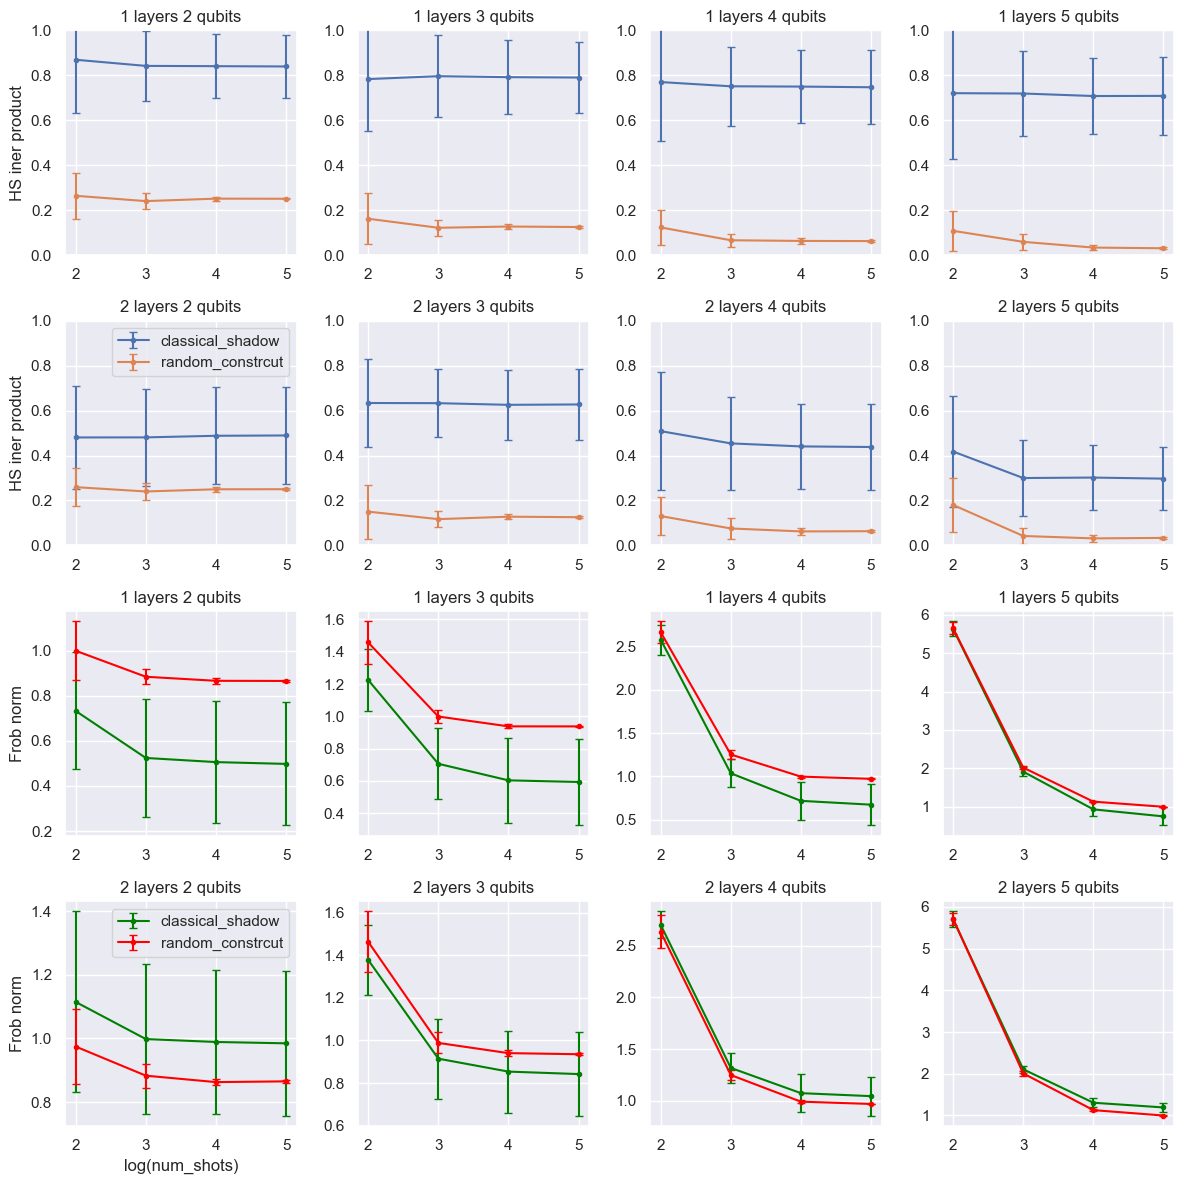

In [49]:
result = np.load("result_random_comparison.npy", allow_pickle=True).item()

loop_seed    = list(range(25))
loop_layers  = [1,2]
loop_qubits  = [2,3,4,5]
loop_shots   = [int(1E2), int(1E3), int(1E4), int(1E5)]

fig, ax = plt.subplots(len(loop_layers)*2, len(loop_qubits), figsize=(len(loop_qubits)*3, len(loop_layers)*3*2))
HS, FROB  = 0, 1
MEAN, STD = 0, 1
CS, RND   = 0, 1

mean_std_matrix = np.zeros((len(loop_layers), len(loop_qubits), 2, 2, 2, len(loop_shots)))
for l, q, s in product(range(len(loop_layers)), range(len(loop_qubits)), range(len(loop_shots))):
    target_layers, target_qubits, target_shots = loop_layers[l], loop_qubits[q], loop_shots[s]
    target_result = []
    for random_seed in range(25):
        result_key = f"seed{random_seed}_l{target_layers}_q{target_qubits}_shots{target_shots}"
        target_result.append(result[result_key])
    target_result = np.array(target_result).T
    # (layers, qubits, norm, random_construct, measn_std, shots)
    mean_std_matrix[l][q][HS][CS][MEAN][s]  = np.mean(target_result[0])
    mean_std_matrix[l][q][HS][CS][STD][s]   = np.std(target_result[0])
    mean_std_matrix[l][q][HS][RND][MEAN][s]  = np.mean(target_result[1])
    mean_std_matrix[l][q][HS][RND][STD][s]   = np.std(target_result[1])
    mean_std_matrix[l][q][FROB][CS][MEAN][s]  = np.mean(target_result[2])
    mean_std_matrix[l][q][FROB][CS][STD][s]   = np.std(target_result[2])
    mean_std_matrix[l][q][FROB][RND][MEAN][s]  = np.mean(target_result[3])
    mean_std_matrix[l][q][FROB][RND][STD][s]   = np.std(target_result[3])
    
for l, q in product(range(len(loop_layers)), range(len(loop_qubits))):
    # Hilbert-Schmidt
    ax[l][q].errorbar([2,3,4,5], mean_std_matrix[l][q][HS][CS][MEAN], mean_std_matrix[l][q][HS][CS][STD], 
            marker=".", label="classical_shadow", capsize=3)
    ax[l][q].errorbar([2,3,4,5], mean_std_matrix[l][q][HS][RND][MEAN], mean_std_matrix[l][q][HS][RND][STD], 
            marker=".", label="random_constrcut", capsize=3)
    ax[l][q].set_ylim(0,1)
    # Forbenius
    ax[l+2][q].errorbar([2,3,4,5], mean_std_matrix[l][q][FROB][CS][MEAN], mean_std_matrix[l][q][FROB][CS][STD], 
            marker=".", label="classical_shadow", capsize=3, color="green")
    ax[l+2][q].errorbar([2,3,4,5], mean_std_matrix[l][q][FROB][RND][MEAN], mean_std_matrix[l][q][FROB][RND][STD], 
            marker=".", label="random_constrcut", capsize=3, color="red")
    ax[l][q].set_ylim(0,1)
    ax[l][q].set_title(f"{loop_layers[l]} layers {loop_qubits[q]} qubits")
    ax[l+2][q].set_title(f"{loop_layers[l]} layers {loop_qubits[q]} qubits")

ax[1][0].legend()
ax[3][0].legend()
ax[-1][0].set_xlabel("log(num_shots)")
ax[0][0].set_ylabel("HS iner product")
ax[1][0].set_ylabel("HS iner product")
ax[2][0].set_ylabel("Frob norm")
ax[3][0].set_ylabel("Frob norm")
plt.tight_layout()
plt.savefig("result_random_comparison.png")